In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
import seaborn as sns

import plotly
import chart_studio.plotly as py
import plotly.io as pio
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot

from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

from scipy import stats

In [2]:
df_pre = pd.read_csv('./PL_Payroll_Income.csv', header=0)

In [3]:
df = df_pre.dropna(axis=0)
df['BusinessMonth'] = pd.to_datetime(df['BusinessMonth'])
df.sort_values('BusinessMonth', inplace=True)

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [4]:
df

,LocationNo,BusinessMonth,rollavg_Income,rollavg_Payroll,rollavg_PayrollPct,change_Income,change_Payroll,change_PayrollPct,change_BuyTransactions,change_BuyItems,...,change6mo_Payroll,change6mo_PayrollPct,change12mo_Payroll,change12mo_PayrollPct,change3mo_BuyTransactions,change3mo_BuyItems,change6mo_BuyTransactions,change6mo_BuyItems,change12mo_BuyTransactions,change12mo_BuyItems
24,1,2010-10-01,3.084105,3.189781,0.006891,-0.056779,-0.041373,0.004383,-0.078329,-0.078329,...,-0.073497,-0.000503,-0.057513,-0.016764,-0.102756,-0.102756,-0.079537,-0.079537,0.053574,0.053574
2967,25,2010-10-01,-0.011049,-0.040496,-0.007931,-0.017454,-0.043577,-0.006740,-0.012581,-0.012581,...,-0.065388,-0.020160,0.000656,-0.010883,-0.027461,-0.027461,-0.000183,-0.000183,-0.009224,-0.009224
3095,26,2010-10-01,0.357884,0.216525,-0.027726,-0.003935,0.003414,0.001412,-0.011510,-0.011510,...,-0.026767,-0.001700,-0.053914,0.004832,-0.022387,-0.022387,-0.064079,-0.064079,-0.122002,-0.122002
3223,29,2010-10-01,0.155785,0.109380,-0.010694,-0.028645,-0.064591,-0.009358,-0.052417,-0.052417,...,-0.092210,-0.022074,-0.096400,-0.020452,-0.054674,-0.054674,-0.046564,-0.046564,-0.033430,-0.033430
3351,30,2010-10-01,0.144906,0.106596,-0.008912,0.067913,-0.002798,-0.017618,0.046327,0.046327,...,0.250986,0.033401,0.193976,0.025727,0.007986,0.007986,-0.018836,-0.018836,-0.073987,-0.073987
3479,31,2010-10-01,0.419842,0.368459,-0.009639,0.043827,0.153713,0.023217,0.018273,0.018273,...,0.125304,0.031265,-0.002026,0.012739,0.006060,0.006060,-0.021368,-0.021368,-0.033480,-0.033480
3607,32,2010-10-01,-0.257776,-0.065830,0.068877,-0.086994,0.098150,0.054876,-0.072994,-0.072994,...,0.079983,0.038755,-0.059688,-0.008240,-0.055713,-0.055713,-0.069911,-0.069911,-0.079488,-0.079488
2839,24,2010-10-01,0.116113,0.109263,-0.001635,0.017237,0.012925,-0.001130,0.091768,0.091768,...,0.069690,0.013686,0.086063,0.009626,0.100225,0.100225,0.129606,0.129606,0.138103,0.138103
3735,33,2010-10-01,0.102164,0.132543,0.007340,-0.079415,0.000345,0.021037,-0.047943,-0.047943,...,-0.017102,0.008371,-0.040588,-0.006960,-0.034752,-0.034752,-0.026138,-0.026138,-0.011572,-0.011572
3991,35,2010-10-01,0.081254,0.118710,0.009226,-0.003896,0.022732,0.006931,0.028622,0.028622,...,-0.024462,-0.006765,-0.008056,0.011459,0.010471,0.010471,0.016635,0.016635,-0.035017,-0.035017


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7903 entries, 24 to 9982
Data columns (total 22 columns):
LocationNo                    7903 non-null int64
BusinessMonth                 7903 non-null datetime64[ns]
rollavg_Income                7903 non-null float64
rollavg_Payroll               7903 non-null float64
rollavg_PayrollPct            7903 non-null float64
change_Income                 7903 non-null float64
change_Payroll                7903 non-null float64
change_PayrollPct             7903 non-null float64
change_BuyTransactions        7903 non-null float64
change_BuyItems               7903 non-null float64
change3mo_Payroll             7903 non-null float64
change3mo_PayrollPct          7903 non-null float64
change6mo_Payroll             7903 non-null float64
change6mo_PayrollPct          7903 non-null float64
change12mo_Payroll            7903 non-null float64
change12mo_PayrollPct         7903 non-null float64
change3mo_BuyTransactions     7903 non-null float64
cha

In [6]:
filt_err = (abs(df['change_Payroll']) < 0.25) & (abs(df['change_Income']) < 0.25) 
df = df[filt_err]
#df = df[df['BusinessMonth'] == '5/1/2019']

In [7]:
stats.pearsonr(df['change3mo_Payroll'], df['change_Income'])

(0.3982593077593784, 1.2719890832712573e-297)

In [8]:
sns.set_style('whitegrid')

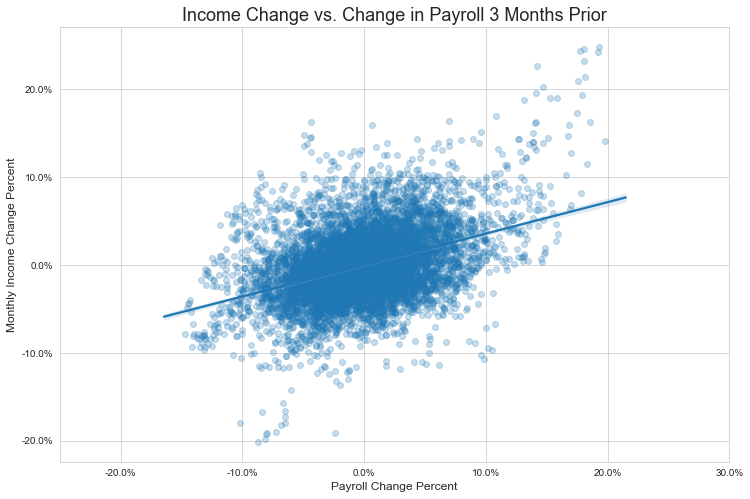

In [9]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.regplot(df['change3mo_Payroll'], df['change_Income'], scatter_kws= dict(alpha= 0.25), ax=ax)
ax.set_xlim(-0.25, 0.3)
ax.set_title('Income Change vs. Change in Payroll 3 Months Prior', fontsize=18)
ax.set_xlabel('Payroll Change Percent', fontsize=12)
ax.set_ylabel('Monthly Income Change Percent', fontsize=12)
list_xticklabels = ax.get_xticks()
list_yticklabels = ax.get_yticks()
ax.set_xticklabels(['{:0.01%}'.format(i) for i in list_xticklabels])
ax.set_yticklabels(['{:0.01%}'.format(i) for i in list_yticklabels])
plt.show()

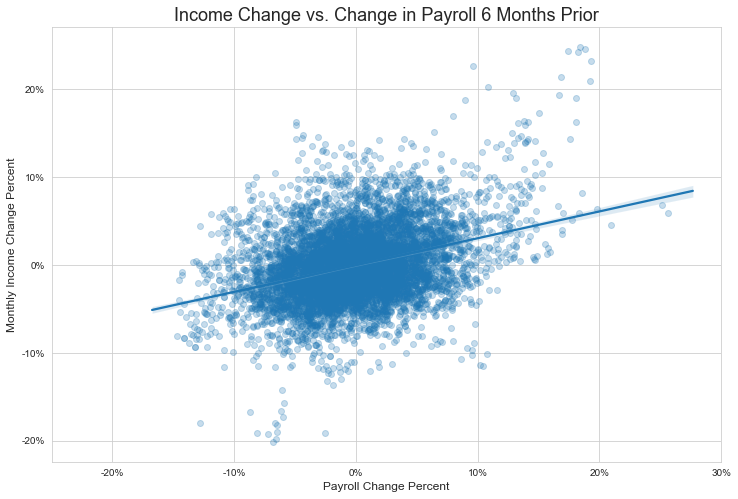

In [57]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.regplot(df['change6mo_Payroll'], df['change_Income'], scatter_kws= dict(alpha= 0.25), ax=ax)
ax.set_xlim(-0.25, 0.3)
ax.set_title('Income Change vs. Change in Payroll 6 Months Prior', fontsize=18)
ax.set_xlabel('Payroll Change Percent', fontsize=12)
ax.set_ylabel('Monthly Income Change Percent', fontsize=12)
list_xticklabels = ax.get_xticks()
list_yticklabels = ax.get_yticks()
ax.set_xticklabels(['{:0.0%}'.format(i) for i in list_xticklabels])
ax.set_yticklabels(['{:0.0%}'.format(i) for i in list_yticklabels])
plt.show()

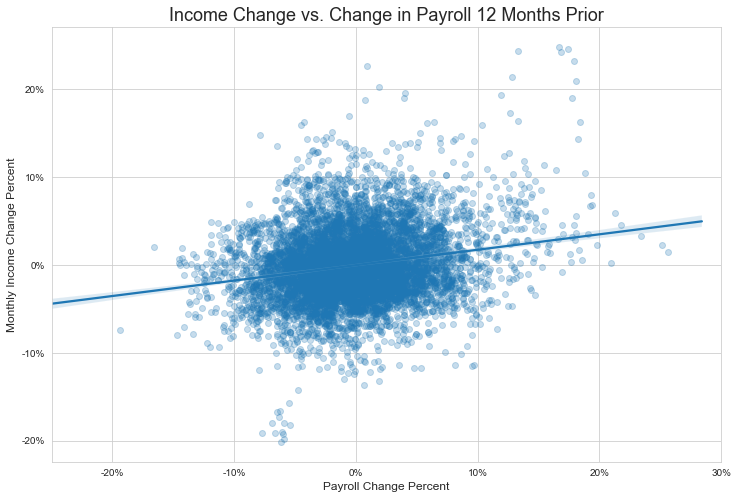

In [61]:
fig, ax = plt.subplots(figsize = (12, 8))
sns.regplot(df['change12mo_Payroll'], df['change_Income'], scatter_kws= dict(alpha= 0.25), ax=ax)
ax.set_xlim(-0.25, 0.3)
ax.set_title('Income Change vs. Change in Payroll 12 Months Prior', fontsize=18)
ax.set_xlabel('Payroll Change Percent', fontsize=12)
ax.set_ylabel('Monthly Income Change Percent', fontsize=12)
list_xticklabels = ax.get_xticks()
list_yticklabels = ax.get_yticks()
ax.set_xticklabels(['{:0.0%}'.format(i) for i in list_xticklabels])
ax.set_yticklabels(['{:0.0%}'.format(i) for i in list_yticklabels])
plt.show()

In [11]:
filt_LowPayrollPct = df['rollavg_PayrollPct'] <= -0.015
filt_MidPayrollPct = (abs(df['rollavg_PayrollPct']) < 0.015)
filt_HighPayrollPct =  (df['rollavg_PayrollPct'] > 0.015)

In [12]:
print(filt_LowPayrollPct.sum(), filt_MidPayrollPct.sum(), filt_HighPayrollPct.sum())

1877 3897 2100


In [13]:
df['PayrollPctGroup'] = np.nan
df.loc[filt_LowPayrollPct, 'PayrollPctGroup'] = 'Low'
df.loc[filt_MidPayrollPct, 'PayrollPctGroup'] = 'Mid'
df.loc[filt_HighPayrollPct, 'PayrollPctGroup'] = 'High'

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [14]:
filt_NegGrowthPct = df['change_Income'] <= (-0.01)
filt_NoGrowthPct = (abs(df['change_Income']) < 0.01)
filt_PosGrowthPct =  (df['change_Income'] >= 0.01)

In [15]:
df['IncomeGrowthGroup'] = np.nan
df.loc[filt_NegGrowthPct , 'IncomeGrowthGroup'] = 'Neg'
df.loc[filt_NoGrowthPct , 'IncomeGrowthGroup'] = 'No'
df.loc[filt_PosGrowthPct , 'IncomeGrowthGroup'] = 'Pos'

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [16]:
sns.set_style('whitegrid')

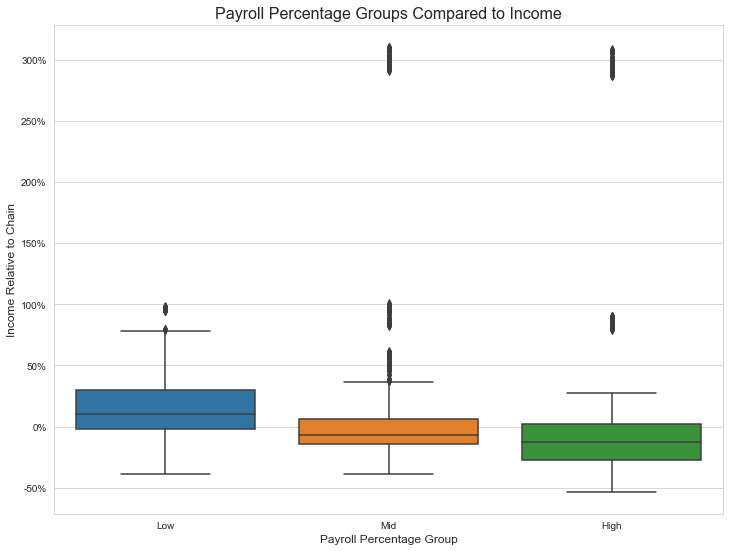

In [65]:
sns.style='whitegrid'
fig, ax = plt.subplots(figsize=(12,9))
sns.boxplot(x=df['PayrollPctGroup'], y=df['rollavg_Income'], order = ['Low', 'Mid', 'High'], ax=ax)
ax.set_title('Payroll Percentage Groups Compared to Income', fontsize=16)
ax.set_xlabel('Payroll Percentage Group', fontsize=12)
ax.set_ylabel('Income Relative to Chain', fontsize=12)
list_yticklabels = ax.get_yticks()
ax.set_yticklabels(['{:0.0%}'.format(i) for i in list_yticklabels])
plt.show()

In [19]:
model = ols('rollavg_Income ~ C(PayrollPctGroup)', data=df).fit()

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         rollavg_Income   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     109.7
Date:                Mon, 30 Sep 2019   Prob (F-statistic):           1.04e-47
Time:                        11:24:04   Log-Likelihood:                -4154.8
No. Observations:                7874   AIC:                             8316.
Df Residuals:                    7871   BIC:                             8336.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

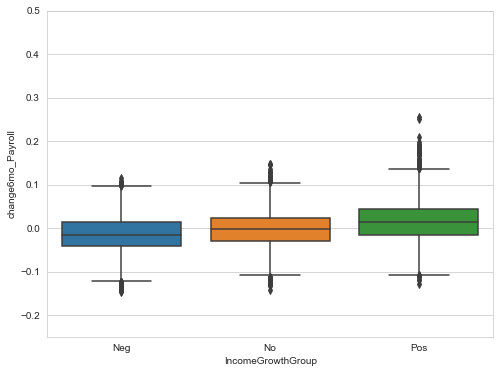

In [80]:
sns.style='whitegrid'
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=df['IncomeGrowthGroup'], y=df['change6mo_Payroll'], ax=ax)
plt.ylim(-0.25, 0.5)
plt.show()

In [22]:
model = ols('change3mo_Payroll ~ C(IncomeGrowthGroup)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      change3mo_Payroll   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     470.6
Date:                Mon, 30 Sep 2019   Prob (F-statistic):          8.75e-194
Time:                        11:24:05   Log-Likelihood:                 13416.
No. Observations:                7875   AIC:                        -2.683e+04
Df Residuals:                    7872   BIC:                        -2.681e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept         

In [23]:
mc = MultiComparison(df['change3mo_Payroll'], df['IncomeGrowthGroup'])
result = mc.tukeyhsd()
 
print(result)
print(mc.groupsunique)

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff lower  upper  reject
-------------------------------------------
 Neg     No    0.0147  0.0116 0.0178  True 
 Neg    Pos    0.0343  0.0317 0.0369  True 
  No    Pos    0.0196  0.0164 0.0228  True 
-------------------------------------------
['Neg' 'No' 'Pos']


In [66]:
filt_NegPayrollGrowth = df['change3mo_Payroll'] <= 0
filt_PosPayrollGrowth =  (df['change3mo_Payroll'] > 0)

In [67]:
df['PayrollPctChangeGroup'] = np.nan
df.loc[filt_NegPayrollGrowth, 'PayrollPctChangeGroup'] = 'Decrease'
df.loc[filt_PosPayrollGrowth, 'PayrollPctChangeGroup'] = 'Increase'

df['PayrollChangeGroup'] = np.nan
df.loc[filt_NegPayrollGrowth, 'PayrollChangeGroup'] = 'Decrease'
df.loc[filt_PosPayrollGrowth, 'PayrollChangeGroup'] = 'Increase'

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

C:\Users\WMiller\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



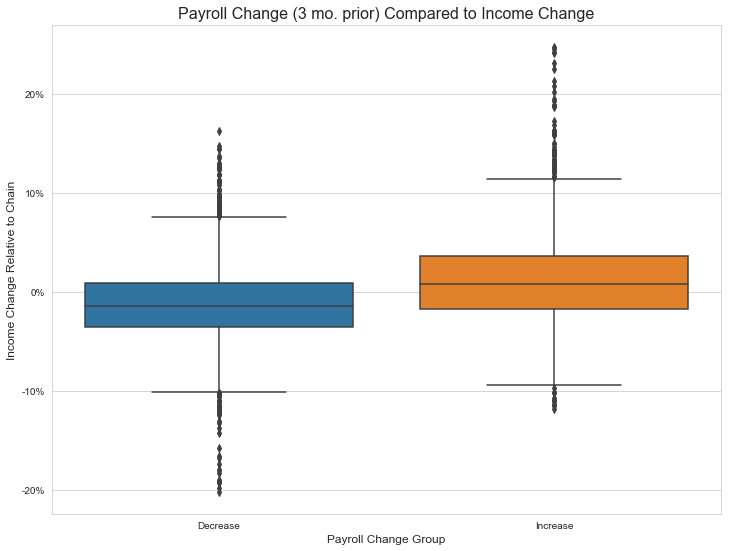

In [82]:
sns.style='whitegrid'
fig, ax = plt.subplots(figsize=(12,9))
sns.boxplot(x=df['PayrollChangeGroup'], y=df['change_Income'], ax=ax)
ax.set_title('Payroll Change (3 mo. prior) Compared to Income Change', fontsize=16)
ax.set_xlabel('Payroll Change Group', fontsize=12)
ax.set_ylabel('Income Change Relative to Chain', fontsize=12)
list_yticklabels = ax.get_yticks()
ax.set_yticklabels(['{:0.0%}'.format(i) for i in list_yticklabels])
plt.show()
plt.show()

In [56]:
model = ols('change_Income ~ C(PayrollChangeGroup)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          change_Income   R-squared:                       0.083
Model:                            OLS   Adj. R-squared:                  0.083
Method:                 Least Squares   F-statistic:                     713.7
Date:                Mon, 30 Sep 2019   Prob (F-statistic):          1.41e-150
Time:                        11:29:07   Log-Likelihood:                 14167.
No. Observations:                7875   AIC:                        -2.833e+04
Df Residuals:                    7873   BIC:                        -2.832e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

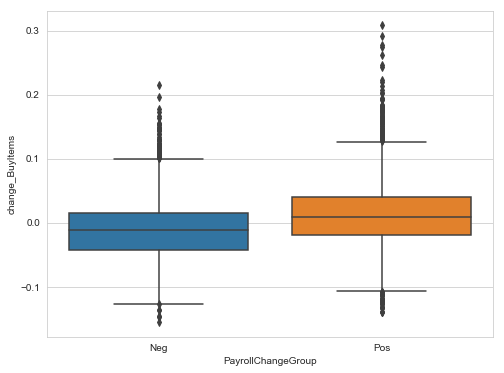

In [28]:
sns.style='whitegrid'
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(x=df['PayrollChangeGroup'], y=df['change_BuyItems'], ax=ax)
plt.show()

In [29]:
model = ols('change_BuyItems ~ C(PayrollChangeGroup)', data=df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        change_BuyItems   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.063
Method:                 Least Squares   F-statistic:                     532.3
Date:                Mon, 30 Sep 2019   Prob (F-statistic):          5.03e-114
Time:                        11:24:06   Log-Likelihood:                 12906.
No. Observations:                7875   AIC:                        -2.581e+04
Df Residuals:                    7873   BIC:                        -2.579e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept       

In [30]:
df[(df['PayrollPctGroup'] == 'Low') & (df['BusinessMonth'] == '5/1/2019')][['LocationNo', 'change_Income', 'PayrollChangeGroup', 'PayrollPctGroup']]

,LocationNo,change_Income,PayrollChangeGroup,PayrollPctGroup
7422,65,0.012649,Neg,Low
7934,69,0.006126,Pos,Low
4606,39,0.034816,Neg,Low
9214,81,-0.036707,Neg,Low
1535,12,-0.019107,Neg,Low
9726,85,-0.001567,Neg,Low
1407,11,0.076199,Pos,Low
4094,35,0.006271,Neg,Low
8446,73,0.003038,Pos,Low
255,2,-0.024192,Pos,Low


In [31]:
plt_PayrollPctHist_filt = df['LocationNo'].isin(df[(df['PayrollPctGroup'] == 'Low') & (df['BusinessMonth'] == '5/1/2019')]['LocationNo'])

In [85]:
list_pltlocs = [str(d) for d in df[plt_PayrollPctHist_filt]['LocationNo'].unique()]

trace_PayrollPctHist = dict.fromkeys(list_pltlocs)
trace_IncomeHist = dict.fromkeys(list_pltlocs)

for loc in list_pltlocs:
    plt_LocationFilt = df['LocationNo'] == float(loc)
    trace_PayrollPctHist[loc] = go.Scatter(
            x=df[plt_PayrollPctHist_filt & plt_LocationFilt]['BusinessMonth'],
            y=df[plt_PayrollPctHist_filt & plt_LocationFilt]['change3mo_Payroll'],
            legendgroup = loc,
            visible='legendonly',
            name = '{:.0f}'.format(float(loc)) + ' Payroll'
            )

    trace_IncomeHist[loc] = go.Scatter(
            x=df[plt_PayrollPctHist_filt & plt_LocationFilt]['BusinessMonth'],
            y=df[plt_PayrollPctHist_filt & plt_LocationFilt]['change_Income'],
            legendgroup = loc,
            visible='legendonly',
            name = '{:.0f}'.format(float(loc)) + ' Income'
            )

layout = go.Layout(
    title=go.layout.Title(
        text='Gross Profit Scale Comparison',
        xref='paper',
        x=0,
        xanchor='left'),
    legend=dict(x=1.05, y=.5, xanchor='left', yanchor='middle'),
    margin=go.layout.Margin(
        l=50,
        r=50,
        b=100,
        t=50,
        pad=4,
        autoexpand=True),
    xaxis = dict(tickformat = '%Y-%m-%d', tickangle=80, dtick='M6'),
    yaxis=dict(tickfont=dict(family='Arial, san-serif'),
               tickformat = '.0%', hoverformat='.0%'),
    hovermode='x'
)

#fig = go.FigureWidget(data=[trace_PayrollPctHist, trace_IncomeHist], layout=layout)
fig = go.FigureWidget(data=list(trace_PayrollPctHist.values()) + list(trace_IncomeHist.values()), layout=layout)
plt_ScaleComparison = plotly.offline.plot(fig, output_type='div')
iplot(fig)